In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
%matplotlib inline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

<AxesSubplot:>

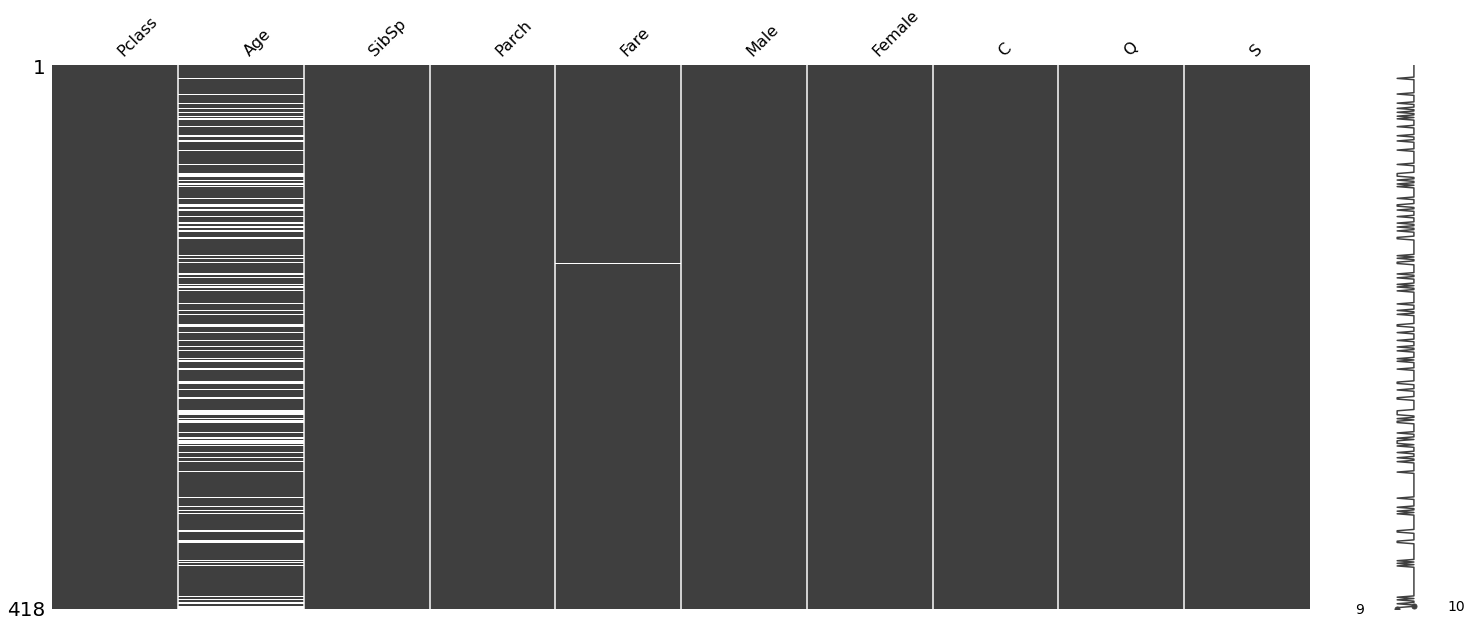

In [3]:
df = pd.read_csv("../input/titanic/train.csv")
df2 = pd.read_csv("../input/titanic/test.csv")

df.drop("Name", axis=1, inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
dum = pd.get_dummies(df["Sex"])
df["Male"] = dum["male"]
df["Female"] = dum["female"]
df.drop("Sex", axis=1, inplace=True)
dum = pd.get_dummies(df["Embarked"])
df["C"] = dum["C"]
df["Q"] = dum["Q"]
df["S"] = dum["S"]
df.drop("Embarked", axis=1, inplace=True)
df.drop("PassengerId", axis=1, inplace=True)

df2.drop("Name", axis=1, inplace=True)
df2.drop("Cabin", axis=1, inplace=True)
df2.drop("Ticket", axis=1, inplace=True)
dum = pd.get_dummies(df2["Sex"])
df2["Male"] = dum["male"]
df2["Female"] = dum["female"]
df2.drop("Sex", axis=1, inplace=True)
dum = pd.get_dummies(df2["Embarked"])
df2["C"] = dum["C"]
df2["Q"] = dum["Q"]
df2["S"] = dum["S"]
df2.drop("Embarked", axis=1, inplace=True)
df2.drop("PassengerId", axis=1, inplace=True)
msno.matrix(df2)

In [4]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

<AxesSubplot:>

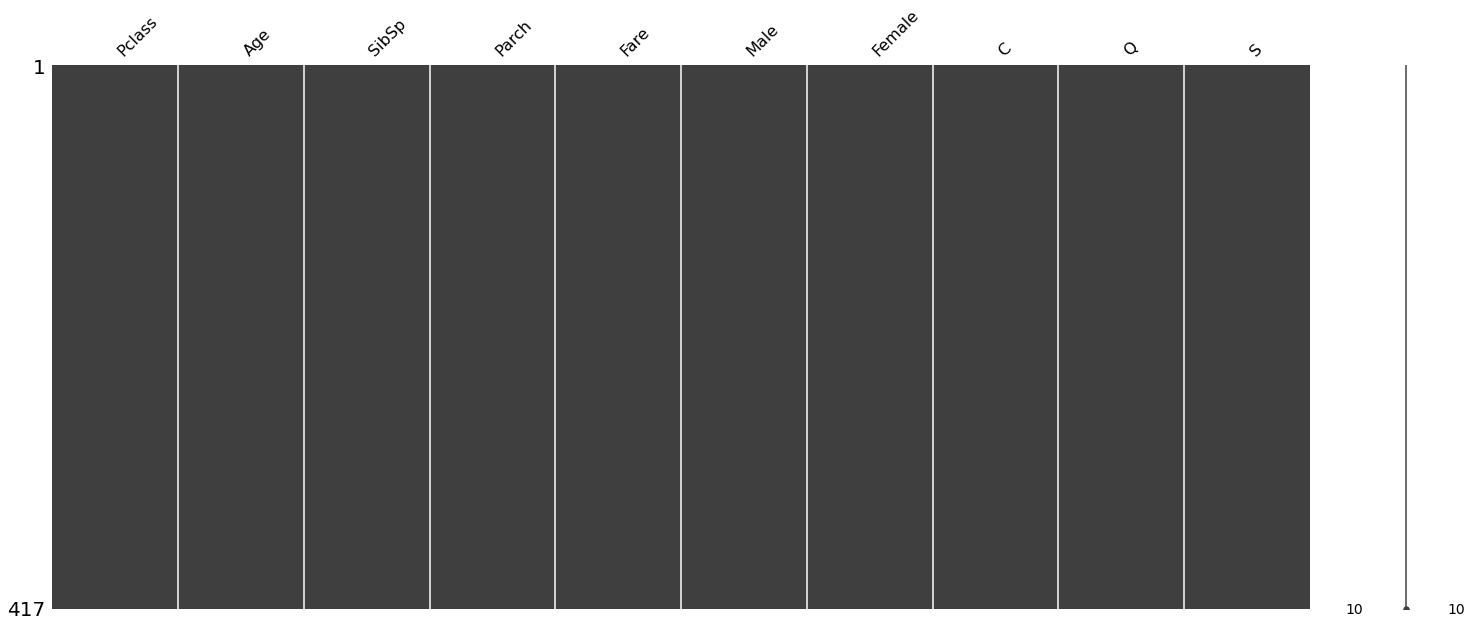

In [5]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.dropna(inplace=True)

df2['Age'] = df2[['Age','Pclass']].apply(impute_age,axis=1)
df2.dropna(inplace=True)
msno.matrix(df2)

In [6]:
X = df.drop("Survived", axis=1, inplace=False)
y = df["Survived"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [9]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
from sklearn.metrics import classification_report
predictions = model.predict(df2)

pred_f = pd.DataFrame(index=pd.read_csv("../input/titanic/test.csv")["PassengerId"])
pred_f["Survived"] = pd.read_csv("../input/titanic/gender_submission.csv")['Survived']
pred_f.to_csv('predict.csv')